# Линейная регрессия

## Реализация в Python

Попробуем  в качестве знакомства с линейной регрессией обучим совсем простую модель, которая будет предсказывать тормозной путь автомобиля в зависимости от скорости.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
myData = pd.read_csv('../data/mycar.csv')

In [3]:
myData.head()

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


У нас здесь всего два признака: один из них будет зависимой переменной, а другой — независимой.

In [11]:
X = myData.iloc[:,:-1].values
Y = myData.iloc[:,1].values

In [22]:
X = myData.loc[:, ['Speed']].values
Y = myData.loc[:, 'Stopping_dist'].values

Для начала нам необходимо разделить выборку (то есть все наши объекты) на обучающую и тестовую. Давайте разберемся, зачем это нужно.

Дело в том, что нам не столько важно, насколько успешно будет алгоритм давать предсказания на наших данных, сколько важно, чтобы он показывал хорошие результаты на реальных данных, «в бою». Можно привести следующую аналогию: обучающая выборка — это тренировочные примеры для нашего алгоритма, а тестовая — экзаменационные.

Обычно выборка делится на обучающую и тестовую не в равных долях: на обучающую  мы берем 70-80 % наблюдений, а на тестовую — 20-30 % наблюдений.

Подгрузим нужную функцию для разбиения:

In [23]:
from sklearn.model_selection import train_test_split

Теперь с помощью этой функции мы получаем независимые и зависимые переменные из обучающей и тестовой выборки. Размер тестовой выборки задаем 0,3.

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

Теперь обучим модель:

In [25]:
from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Итак, модель обучена. Что теперь?

Теперь можем попробовать предсказать значения зависимой переменной для тестовой выборки:

In [26]:
y_pred = myModel.predict(X_test)
display(y_pred)

array([77.42294847, 61.02822837, 15.94274809, 56.92954835, 77.42294847,
       40.53482824, 36.43614822, 61.02822837, 61.02822837, 73.32426845,
       36.43614822, 52.83086832,  7.74538804, 48.7321883 , -4.55065204])

Получаем предсказанные результаты для тестовой выборки.

# Ошибки в линейной регрессии

In [28]:
import pandas as pd               # библиотека для работы с таблицами
import numpy as np                # библиотека для работы с матрицами

Рассмотрим очень простой пример. Предположим, что у нас есть показатели уровня счастья для пяти человек:

In [32]:
y_happy = [4,20,110,15,23]

Допустим, у нас есть показатели счастья для этих же пяти человек, но предсказанные некоторым алгоритмом:

In [29]:
y_happy_pred = [5,15,100,9,21]

Давайте вычислим метрики для этих данных!

In [30]:
from sklearn import metrics  # подгружаем метрики

In [33]:
#Вычисляем MAE:

MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)

print(MAE)

4.8


In [34]:
#Вычисляем MSE:

MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print(MSE)

33.2


In [35]:
#Вычисляем коэффициент детерминации:

R_2 = metrics.r2_score(y_happy, y_happy_pred)
print(R_2)

0.9774247946472284


## Задания:

Чему равна MSE на этих данных F?

In [38]:
f = [1, 3, 2, 5]
f_pred = [2, 3, -1, 4]

In [39]:
MSE = metrics.mean_squared_error(f, f_pred)
print(MSE)

2.75


# Поиск прямой

Задание 3.4.5 
Чему равен коэффициент детерминации на этих данных? Укажите число с точностью до сотых:

In [2]:
import numpy as np

In [3]:
y_pred = np.array([1, 3, 2, 5])
y = np.array([2, 3, -1, 4])

In [6]:
SS_res = ((y - y_pred)**2).sum()

In [8]:
y_mean = y.mean()
SS_tot = ((y - y_mean)**2).sum()

In [9]:
R_sq = 1 - SS_res/SS_tot
round(R_sq, 2)

0.21

# Линейная регрессия. Предобработка

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('../data/data_flats2.csv', sep =';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
id                                       30469 non-null int64
full_sq                                  30469 non-null int64
life_sq                                  24086 non-null float64
floor                                    30302 non-null float64
preschool_education_centers_raion        30469 non-null int64
school_education_centers_raion           30469 non-null int64
school_education_centers_top_20_raion    30469 non-null int64
university_top_20_raion                  30469 non-null int64
sport_objects_raion                      30469 non-null int64
additional_education_raion               30469 non-null int64
culture_objects_top_25_raion             30469 non-null int64
shopping_centers_raion                   30469 non-null int64
metro_km_walk                            30444 non-null float64
kindergarten_km                          30469 non-null float64
school_km      

Что мы можем увидеть по нему? Что у нас есть 20 признаков. Один из них — id, не несет смысловой нагрузки. А один из признаков — наша независимая переменная, которую мы и будем предсказывать. Это цена квартиры (price_doc).

Мы точно можем видеть, что у нас есть пропуски, так как количество наблюдений разное у разных переменных и отличается для некоторых признаков от количества объектов.

Также количество пропусков для каждого признака можно посмотреть следующим образом:

In [17]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

Или можно оценить визульно количество пропусков и их распределение:

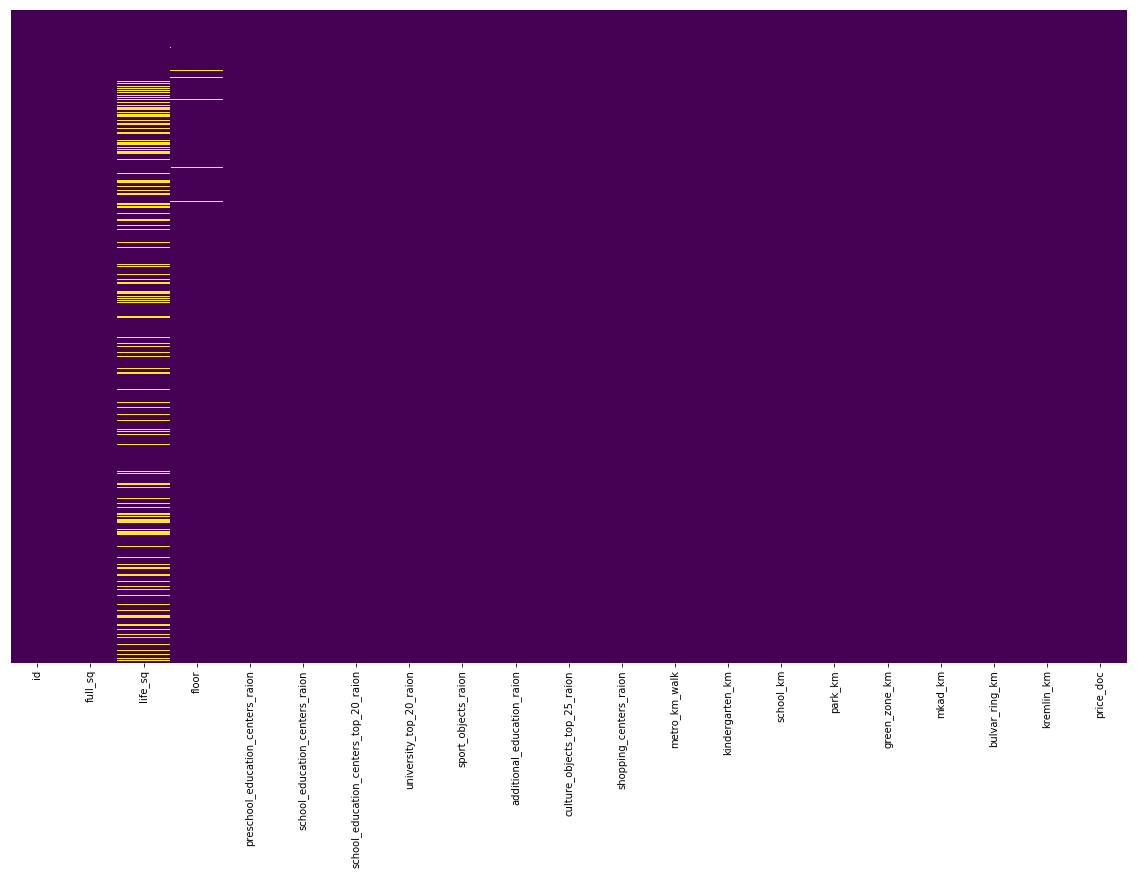

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Здесь фиолетовым показаны заполненные ячейки, а желтым — пропущенные значения. Благодаря этому мы можем сразу оценить количество пропусков и посмотреть, в каких переменных они встречаются. Если пропуски встречаются в большом количестве только в нескольких переменных, которые не являются для нас важными, можно их удалить.

У нас пропуски по сути есть только в одном признаке — жилой площади. Просто не будем брать её в модель.

Далее всегда есть смысл посмотреть на распределение нашей целевой переменной и понять, какие значения мы будем предсказывать:

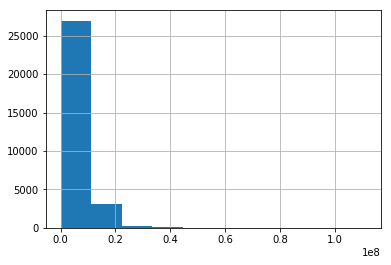

In [19]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. Много квартир в среднем сегменте, но очень мало дорогих квартир. На практике часто в таких случаях логорифмируют переменную, чтобы уменьшить перепады и сгладить хвост.

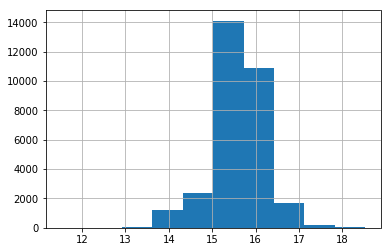

In [20]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

Отлично, выглядит уже лучше!

Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков:

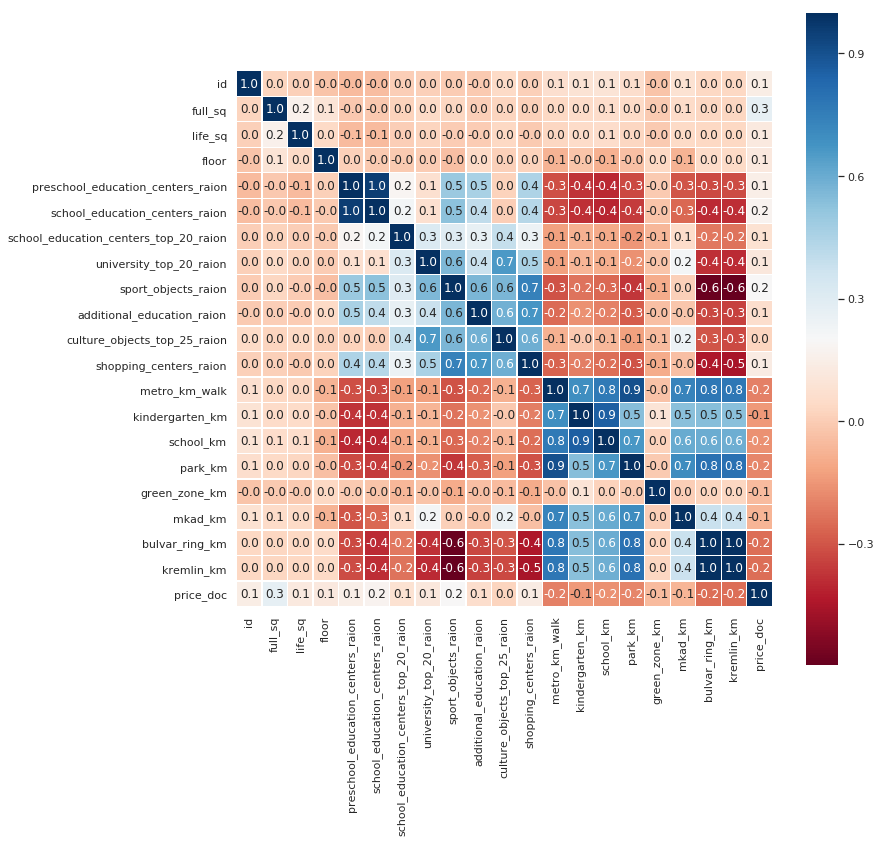

In [21]:
sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Смотрим, у каких пар признаков сильная взаимосвязь:

 - Количество школ и количество детских садов. Довольно логично, так как в Москве детские сады обычно присоединены к школам. Оставляем школы, т.к. у этого признака больше взаимосвязь с целевой переменной.
 - Расстояние до школ и расстояние до детских садов. По сути, это естественным образом вытекает из предыдущего пункта. Оставляем расстояние до школ.
 - Расстояние до парка и до метро. Рассуждая аналогично предыдущим парам, оставляем расстояние до метро.
 - Расстояние до Кремля и до бульварного кольца. У них коэффициент корреляции равен 1, и их корреляция с целевой переменной одинаковая. Поэтому можем убрать любой признак. Убираем расстояние до Кремля.

Итак, нам надо убрать пять признаков (четыре из-за мультиколлинеарности и жилую площадь, так как там много пропусков), остальные оставляем. Теперь наши данные готовы к построению регрессионной модели.

Задание 3.5.1

 1. Удалите строки, где есть хотя бы один пропуск. 
 2. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77.
 3. Нормализуйте отобранные признаки для тестовой и для обучающей выборки отдельно(!) с помощью функции RobustScaler() (функция, которая подобна известным вам методам нормализации, однако использует медианы и квантили для вычисления, поэтому не чувствительна к выбросам и может приводить к лучшим результатам). 
 4. Вычислите MSE. 
 
Не забудьте, что id не несет никакой содержательной информации, поэтому не надо брать его в качестве предиктора! Также не забудьте, что мы логарифмировали зависимую переменную, а значит при подсчете MSE необходимо найти экспоненциальную функцию от ! Округлите ответ до целых.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import metrics  # подгружаем метрики

In [129]:
data = pd.read_csv('../data/data_flats2.csv', sep =';')

In [130]:
# уберем лишние признаки 
columns_drop = ['kremlin_km',
                'preschool_education_centers_raion', 
                'kindergarten_km',
                'park_km', 
                'id', 
                'life_sq']
data.drop(columns_drop, axis=1, inplace=True)

# логарифмируем целевую переменную
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))

# уберем строки, где есть хотя бы один пропуск.
data = data.dropna(axis=0)

In [131]:
# 2. Обучите линейную регрессию, взяв тестовую выборку размера 0.2, random_state=77
# определяем исходнк данные
X = data.drop(['price_doc'], axis=1)
y = data['price_doc']

# делаем разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=77)

# нормализуем признаки
transformer = RobustScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

# Обучаем модель
myModel = LinearRegression() 
myModel.fit(X_train_norm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
# Вычислим целевую переменную 
y_pred = myModel.predict(X_test_norm)

#Вычисляем MSE:
MSE = metrics.mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)
display(np.round(MSE, 0))

16818684371715.0

In [133]:
# Пример решения взятый из слака 
data = pd.read_csv('../data/data_flats2.csv', sep =';')

data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.drop(['kremlin_km','preschool_education_centers_raion', 'kindergarten_km','park_km', 'id', 'life_sq'], axis=1, inplace=True)
data.dropna(inplace = True) # Удаляют все 

X = data.drop(['price_doc'], axis=1)
y = data['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

scaler = RobustScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

reg = LinearRegression().fit(X_train_transformed, y_train)

y_pred = reg.predict(X_test_transformed)

MSE = metrics.mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1)
display(np.round(MSE, 0))

16647931507747.0